<a href="https://colab.research.google.com/github/nazalves/proj_data_science/blob/master/Analisando_os_Dados_do_Airbnb_Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Santiago, Chile


---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste ***notebook***, iremos analisar os dados referentes à cidade Santiago, capital do Chile um país conhecido pelos bons vinhos que produz, e a beleza natural das *Cordilheira dos Andes* e ver quais insights podem ser extraídos a partir de dados brutos.

<center><img alt="" width="40%" src="https://github.com/nazalves/proj_data_science/blob/master/4722.jpg?raw=true"></center>

## Obtenção dos Dados

Todos os dados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snd

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2019-03-15/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma situação inicial consistente e permitir o entendimento de como os dados estão estruturados.

* `As variáveis são as colunas do nosso dataset`

**Dicionário das variáveis**

* id - número de identificação do imóvel
* name - nome da propriedade anunciada 
* host_id - número de identificação do propretário do imóvel
* host name - nome do proprietário
* neighbourhood_group - este atributo não tem nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - tipo de quarto
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de `reviwes`que a propriedade possui
* last_review - data do último `review`
* reviews_per_month - quantidade de `reviews` por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo proprietário
* availability_365 - número de dias de siponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras ou as 5 últimas entradas.

In [29]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14576,Dp Valen Castillo 1600,14972,Bruno,NaN,Santiago,-33.46413,-70.64869,Entire home/apt,67025,5,0,NaN,NaN,1,363
1,34552,Big nd nice room + private bathroom,149223,Gladys,NaN,Santiago,-33.46354,-70.64851,Private room,32172,3,0,NaN,NaN,1,365
2,47936,My Flat in English,218471,Nelsk,NaN,Santiago,-33.44791,-70.63547,Private room,36864,1,0,NaN,NaN,1,365
3,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,36864,3,0,NaN,NaN,3,178
4,50466,Great apartment at a great location,231631,Marco,NaN,Santiago,-33.43630,-70.65390,Entire home/apt,56971,1,0,NaN,NaN,1,365


In [0]:
# mostrar as 5 últimas entradas
df.tail()

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas do nosso conjunto de dados e os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`, há uma versão completa com 29.777 registros e 106 variáveis (colunas).

In [25]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# listar os tipos de dados de cada coluna
# os tipos de dados object são strings (texto)
display(df.dtypes)


Entradas:	 15790
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset, o seu conjunto de dados, está diretamente relacionado à quantidade de valores ausentes (nulos). É importante entender neste início de análise se estes valores nulos são significativos comparados ao total de registros.

* A coluna `neighbourhood_group`possui 100% de valores ausentes (nulos).
* As variáveis `review_per_month` e `last_review` tem quade 50% dos valores nulos.
* As variáveis `name`e `host_name` tem menos de 0,1% de valores nulos. 


In [27]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)


neighbourhood_group               100.000000
reviews_per_month                  43.761875
last_review                        43.761875
name                                0.088664
host_name                           0.031666
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para idenficar como as variáveis estão distibuídas, para identificar `insights` e `outiliers`. irei plotar o histograma.

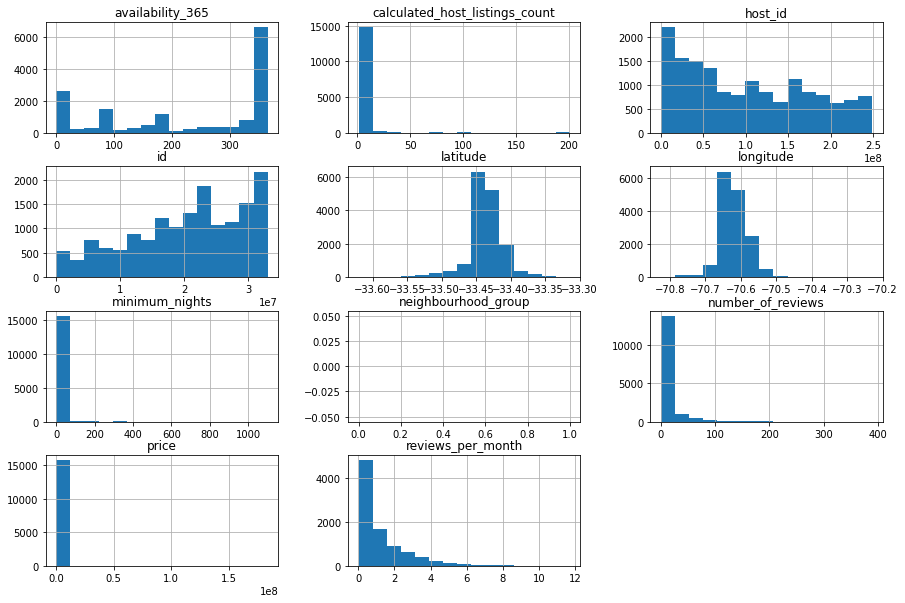

In [28]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**

Pela distribuição no histograma. é possivel verificar indícios da presenta de outliers. Veja por exemplo as variáveis `price, minimum_nights, calculated_host_listings_count`.

Os valores não seguem uma distribuição e acabam distorcendo a representação gráfica. Para confirmar vamos utilizar duas formas para auxiliar na detecção de outliers, que são:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots`para a variável


In [30]:
# ver o resumo estatístico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.579000e+04,15790.000000,15790.000000,8880.000000,15790.000000,15790.000000
mean,7.127307e+04,5.084864,10.664725,1.219730,7.512730,225.009246
std,1.574417e+06,29.440156,25.302336,1.435516,26.243083,143.189742
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.876700e+04,1.000000,0.000000,0.220000,1.000000,88.000000
50%,3.016100e+04,2.000000,1.000000,0.660000,1.000000,287.000000
75%,4.021500e+04,3.000000,8.000000,1.752500,3.000000,363.000000
max,1.838887e+08,1100.000000,389.000000,11.700000,201.000000,365.000000


Verificando o resumo estatístico obtido com o `describe`podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 40215 (259 reais), porém o seu valor máximo é 183888700 (1 milhão de reais)
* A quantidade mínima de noites ( `minimum_nights`) está acima de 365 dias do ano.

#### Boxplot 

Agora vamos usar o `boxplot` para investigar as variáveis com evidências de outliers.




##### *Boxplot  para minimum_nights*

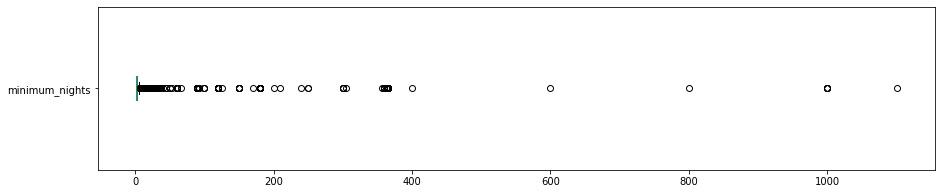

minimum_nights: valores acima de 30:
226 entradas
1.4313%


In [32]:
# minimum_nights
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

##### *Boxplot  para price*

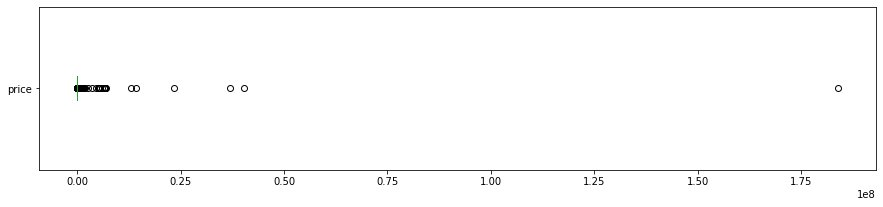

minimum_nights: valores acima de 180000:
229 entradas
1.4503%


In [39]:
# price
df.price.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 180000 aproximadamente 1100 reais
print("minimum_nights: valores acima de 180000:")
print("{} entradas".format(len(df[df.price > 180000])))
print("{:.4f}%".format((len(df[df.price > 180000]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`e `minimum_nights`, vamos limpar o *DataFrame* delas e plotar novamente o histograma.

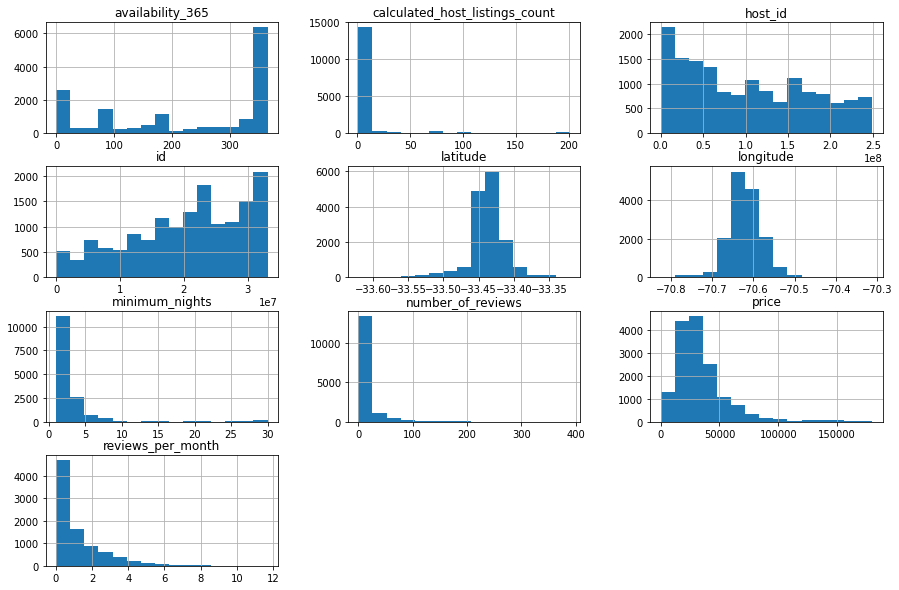

In [40]:
# remover os outliers em um novo DataFrame
# criando uma cópia do dataframe com o nome df_clean e apagando deste data frame os outliers identificados

df_clean = df.copy()

# removendo as linhas (axis=0) com os critérios do outliers identicados
df_clean.drop(df_clean[df_clean.price > 180000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover a coluna (axis = 1) neighbourhood_group pois está vazia
df_clean.drop('neighbourhood_group', axis=1,inplace=True)

# plotar o histograma sem os outliers
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando uma relação ou semelhança entre duas variáveis.

Esta relação pode ser mensurada, e podemos medir sua intensidade através do coeficiente de correlação. Para identificar as correlaçoes existentes entre as variáveis vou:

* Criar uma matriz de correlação
* Gerar um `heatmap`a partir desta matriz, usando a biblioteca seaborn

Vamos perceber pelo `heatmap` que não temos nenhuma *correlaçao relevante* em nosso DataSet.

In [47]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014269,-0.007956,-0.038427,0.020259,0.069673
minimum_nights,-0.014269,1.000000,-0.035128,-0.102277,-0.043748,-0.021530
number_of_reviews,-0.007956,-0.035128,1.000000,0.617324,-0.014859,0.021174
reviews_per_month,-0.038427,-0.102277,0.617324,1.000000,-0.004072,0.000265
calculated_host_listings_count,0.020259,-0.043748,-0.014859,-0.004072,1.000000,0.176382
availability_365,0.069673,-0.021530,0.021174,0.000265,0.176382,1.000000


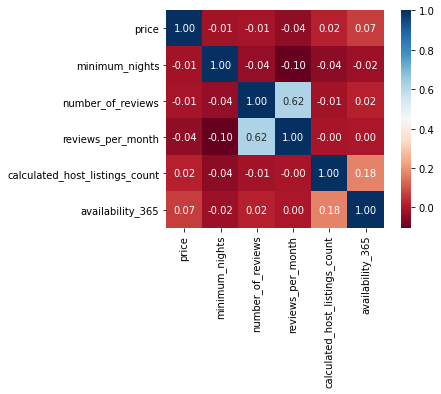

In [48]:
# gerando o haetmap com a biblioteca seaborn

snd.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [0]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamento/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_conts()` .

In [50]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8558
Private room       6427
Shared room         365
Name: room_type, dtype: int64

In [53]:
# mostrar a porcentagem de cada tipo de imóvel disponível em percentual
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    55.752443
Private room       41.869707
Shared room         2.377850
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Santiago?**

Uma maneira de se verificar uma variável em função de outra é usando `groupby()`. No caso, queremos comparar os bairros (`neighbourhoods`) a partir do preço de locação.


In [88]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Lo Barnechea    59886.905109
Vitacura        47704.982234
Quilicura       46431.117647
Las Condes      43899.373887
Maipú           36764.135484
Providencia     35095.140897
Renca           34670.090909
Lo Prado        33906.705882
Huechuraba      33625.563380
Pudahuel        32991.022222
Name: price, dtype: float64

No resultado acima vemos que os bairros `Lo Barnechea, Cerro Navia, Lo Espejo`, estão com as maiores média de preço.

Fiz uma pesquisa para saber quais os bairros mais valoreizados de Santiago, para ter uma base de comparação com os bairros de maior média de preço no nosso DataSet. 

Tendo como referência o site https://bloglavida.com/2015/09/06/santiago-bairro-a-bairro-as-melhores-regioes-para-se-hospedar-ou-morar-2/ , constatei que os melhores bairros são `Las Condes, Vitacura, Providencia, Lo Barnechea, La Reina e Nuñoa`, são considerados os melhores bairros com relação a métrica ICVU-2015 (`Índice de Qualidade de Vida Urbana`).

<center><img alt="" width="60%" src="https://github.com/nazalves/proj_data_science/blob/master/Sanitago_Bairros_QV.png?raw=true"></center>

Como os bairros com a maior média de preço não são os com as melhores opção de se hospedar, resolvi pesquisar a representatividade dos bairros na amostra, para uma melhor análise.


In [98]:
#verificar a quantidade de ocorrências dos bairros para constatar a representatividade da amostra
df_clean.groupby(['neighbourhood']).neighbourhood.count().sort_values(ascending=True)[:10]


neighbourhood
Renca                  11
El Bosque              12
Cerrillos              13
Conchalí               14
Pedro Aguirre Cerda    16
Lo Prado               17
Pudahuel               45
La Cisterna            49
Quilicura              51
San Joaquín            62
Name: neighbourhood, dtype: int64

Com base no resultado acima, vou retirar do *DataFrame* os bairros que tenham menos de 10 ocorrências na tabela e não figuram dentre os bairros com maior ICVU .

Exibição da média de preço por bairro após limpeza.

In [90]:
# Limpeza das amostras com menos representatividade
df_clean.drop(df_clean[df_clean.neighbourhood == "San Ramón"].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.neighbourhood == "Cerro Navia"].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.neighbourhood == "Lo Espejo"].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.neighbourhood == "La Granja"].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.neighbourhood == "La Pintana"].index, axis=0, inplace=True)

# Listagem das localidades por média de preço após limpeza
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lo Barnechea    59886.905109
Vitacura        47704.982234
Quilicura       46431.117647
Las Condes      43899.373887
Maipú           36764.135484
Providencia     35095.140897
Renca           34670.090909
Lo Prado        33906.705882
Huechuraba      33625.563380
Pudahuel        32991.022222
Name: price, dtype: float64

Agora vamos ver a média de preço por tipo de imóvel



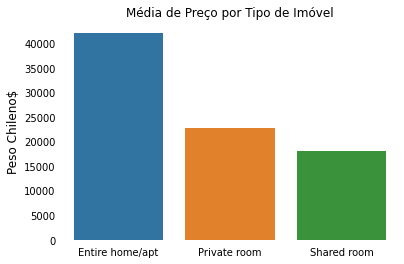

In [97]:
# Calculando média de preço por tipo de Imóvel
type_price = round(df_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

# Mostrar Resultados
print(type_price)
print('\n')

# Plotando média de preço por tipo de imóvel
plot_bar = snd.barplot(type_price.index, type_price) 
plot_bar.set_title('Média de Preço por Tipo de Imóvel')
plot_bar.tick_params(bottom=False, top=False, left=False, right=False);
plot_bar.set_ylabel('Peso Chileno$', fontsize=12)
plot_bar.set_xlabel('')
for kew, spine in plot_bar.spines.items():
    spine.set_visible(False)

Como são fornecidas as latitudes e longitude para os imóveis, é possivel plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

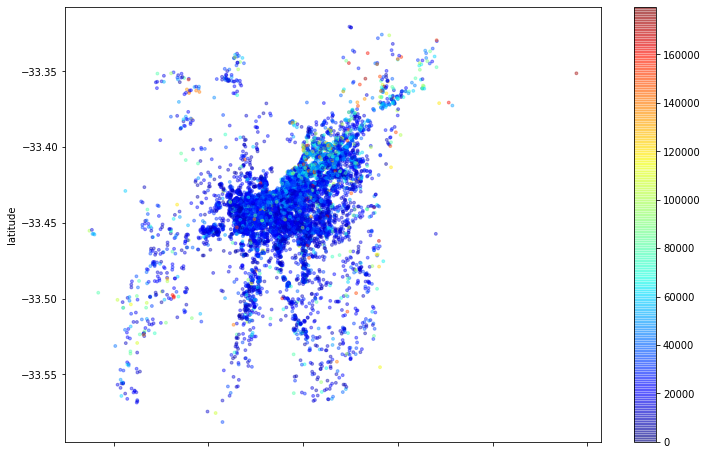

In [81]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [91]:
# Média do mínimo de noites para aluguel `minimum_nights`
df_clean.minimum_nights.mean()

2.716318537859008

In [84]:
# ver a média da coluna `minimum_nights` por bairro `neighbourhood`

df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:10]


neighbourhood
Renca            5.181818
Cerrillos        3.769231
Quinta Normal    3.584416
La Reina         2.991031
Vitacura         2.967005
Las Condes       2.933446
Ñuñoa            2.924824
Lo Prado         2.823529
Santiago         2.800191
Lo Barnechea     2.795620
Name: minimum_nights, dtype: float64

O número médio de noites por aluguel pode ser arrendondado para 3 noites, certamente  a tendência de sexta a domingo, para pegar o final de semana.

## Conclusões


Foi realizada apenas uma análise superficial na base do Airbnb, porém já se percebe que existem outliers em algumas variáveis.

Pode-se notar também que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estastíticas de alguns atributos.

Podemos inferir uma nova variável que poderia ser criada o ICVU o `Índice de Qualidade de Vida Urbana` para uma melhor avaliação por bairro.

Por fim, lembrar que utilizamos um dataser com a versão resumida, ideal apenas para uma abordagem inicial. Para uma análise exploratória mais completa o ideal é utilizar os dados completos que tem 106 atributos disponívies.